<a href="https://colab.research.google.com/github/Jahnvi13/Statistical-Machine-Learning-Assignments/blob/main/SMLassignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SML Assignment 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


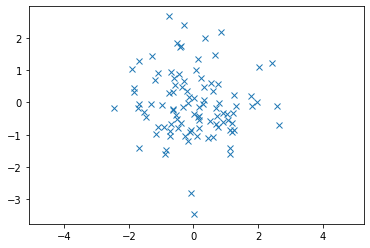

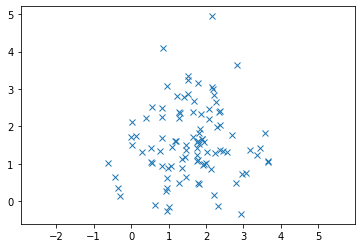

In [ ]:
#A
#1
mean1=[0, 0]
cov1=[[1, 0],[0, 1]]
x1, x2=np.random.default_rng().multivariate_normal(mean1, cov1, 100).T
plt.plot(x1, x2, 'x')
plt.axis('equal')
plt.show()
data=[]
for i in range(100):
  data.append([x1[i], x2[i]])
#now data is the 2x1 matrix containing all the points of class 1

mean2=[1.5, 1.5]
cov2=[[0.8, 0],[0, 0.8]]
X1, X2=np.random.default_rng().multivariate_normal(mean2, cov2, 100).T
plt.plot(X1, X2, 'x')
plt.axis('equal')
plt.show()

data2=[]
for i in range(100):
  data2.append([X1[i], X2[i]])

#data2 is the 2x1 matrix containing all the points of class 2


In [ ]:
data

In [ ]:
#2
#splitting of class 1 data points into train-test bundles
arr_of_one=[]
for i in range(100):
  arr_of_one.append(1)
x_train, x_test, y_train, y_test = train_test_split(data, arr_of_one, test_size=0.5 )
#x_train, x_test, y_train, y_test = train_test_split([item[0] for item in data], [item[1] for item in data], test_size=0.5 )
x_test

In [ ]:
x1mean=sum(item[0] for item in x_train)/50
x2mean=sum(item[1] for item in x_train)/50
mu=[x1mean, x2mean]
print(mu)

x1cov=sum((item[0]-x1mean)*(item[0]-x1mean) for item in x_train)/50
x2cov=sum((item[1]-x2mean)*(item[1]-x2mean) for item in x_train)/50
cov=[[x1cov,0], [0,x2cov] ]
print(cov)

[0.03717631849228136, -0.1847825040492685]
[[1.0724045596477338, 0], [0, 1.1456543879261818]]


In [ ]:
#3
#splitting of class 2 data points into train-test bundles
arr_of_two=[]
for i in range(100):
  arr_of_two.append(2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(data2, arr_of_two, test_size=0.5 )
#x_train2, x_test2, y_train2, y_test2 = train_test_split([item[0] for item in data2], [item[1] for item in data2], test_size=0.5 )

In [ ]:
x1mean=sum(item[0] for item in x_train2)/50
x2mean=sum(item[1] for item in x_train2)/50
mu2=[x1mean, x2mean]
print(mu2)
x1cov=sum((item[0]-x1mean)*(item[0]-x1mean) for item in x_train2)/50
x2cov=sum((item[1]-x2mean)*(item[1]-x2mean) for item in x_train2)/50
cov2=[[x1cov,0], [0,x2cov] ]
print(cov2)

[1.682126403742317, 1.5239397808561386]
[[0.9932785939302556, 0], [0, 1.0709075292932222]]


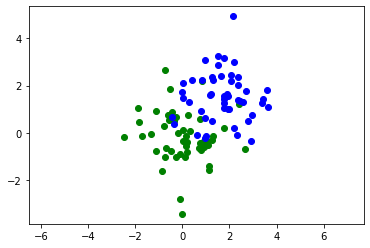

In [ ]:
#4
plt.scatter([item[0] for item in x_train], [item[1] for item in x_train], c='g')
plt.scatter([item[0] for item in x_train2], [item[1] for item in x_train2], c='b')
plt.axis('equal')
plt.show()

In [ ]:
import math

det1=cov[0][0]*cov[1][1]-cov[0][1]*cov[1][0] 
inv1=[[cov[1][1]/det1, -cov[0][1]/det1], [-cov[1][0]/det1, cov[0][0]/det1]]

det2=cov2[0][0]*cov2[1][1]-cov2[0][1]*cov2[1][0] 
inv2=[[cov2[1][1]/det2, -cov2[0][1]/det2], [-cov2[1][0]/det2, cov2[0][0]/det2]]

m1=mu[0]
m2=mu[1]
t3=inv1[0][0]*m1*m1 + (inv1[0][1]+inv1[1][0])*m1*m2 + inv1[1][1]*m2*m2

m1d=mu2[0]
m2d=mu2[1]
t3d=inv2[0][0]*m1d*m1d + (inv2[0][1]+inv2[1][0])*m1d*m2d + inv2[1][1]*m2d*m2d
ct=0
for i in range(0,len(x_test)):
  item=x_test[i]

  x1=item[0]
  x2=item[1]
  t1=inv1[0][0]*x1*x1 + (inv1[0][1]+inv1[1][0])*x1*x2 + inv1[1][1]*x2*x2
  t2=2*(inv1[0][0]*m1*x1 + inv1[0][1]*m1*x2 + inv1[1][0]*x1*m2 + inv1[1][1]*m2*x2)
  
  g1=np.log(1/math.sqrt(det1)) - 1/2*(t1-t2+t3)
  
  t1=inv2[0][0]*x1*x1 + (inv2[0][1]+inv2[1][0])*x1*x2 + inv2[1][1]*x2*x2
  t2=2*(inv2[0][0]*m1d*x1 + inv2[0][1]*m1d*x2 + inv2[1][0]*x1*m2d + inv2[1][1]*m2d*x2)
  
  g2=np.log(1/math.sqrt(det2)) - 1/2*(t1-t2+t3d)
  #print(str(g1)+" "+str(g2))
  if(g1>g2):
    ypred=1
  else:
    ypred=2
  
  if(ypred==y_test[i]):
    ct+=1 

print(ct)
ct=0
for i in range(0,len(x_test2)):
  item=x_test2[i]

  x1=item[0]
  x2=item[1]
  t1=inv1[0][0]*x1*x1 + (inv1[0][1]+inv1[1][0])*x1*x2 + inv1[1][1]*x2*x2
  t2=2*(inv1[0][0]*m1*x1 + inv1[0][1]*m1*x2 + inv1[1][0]*x1*m2 + inv1[1][1]*m2*x2)
  
  g1=np.log(1/math.sqrt(det1)) - 1/2*(t1-t2+t3)
  
  t1=inv2[0][0]*x1*x1 + (inv2[0][1]+inv2[1][0])*x1*x2 + inv2[1][1]*x2*x2
  t2=2*(inv2[0][0]*m1d*x1 + inv2[0][1]*m1d*x2 + inv2[1][0]*x1*m2d + inv2[1][1]*m2d*x2)
  
  g2=np.log(1/math.sqrt(det2)) - 1/2*(t1-t2+t3d)
  #print(str(g1)+" "+str(g2))
  if(g1>g2):
    ypred=1
  else:
    ypred=2
  
  if(ypred==y_test2[i]):
    ct+=1 
print(ct)
#plt.plot(x,y)


42
46


In [ ]:
from scipy.stats import bernoulli

In [ ]:
#B
#1
r=bernoulli.rvs(0.2, size=1000)
r

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#2
sum(r)/1000

0.2

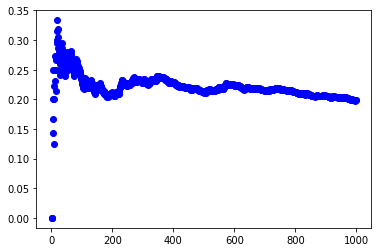

In [ ]:
#3
x=[]
y=[]
for i in range(1,1000):
  x.append(i)
  y.append(sum(r[:i]/i))

plt.scatter(x,y, c='b')
plt.show()

Observation: MLE gives incorrect estimates for low values of n but as the sample size grows, the estimate of p comes closer and closer to the real value

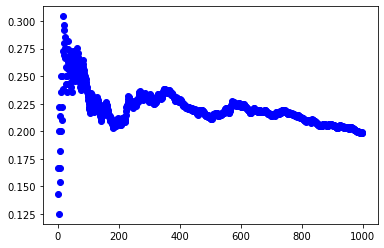

In [ ]:
x=[]
y=[]
for i in range(1,1000):
  x.append(i)
  y.append((sum(r[:i])+1)/(i+5))

plt.scatter(x,y, c='b')
plt.show()

For lesser values of n, the deviation of theta's estimate from real value was less in MAP than in MLE.

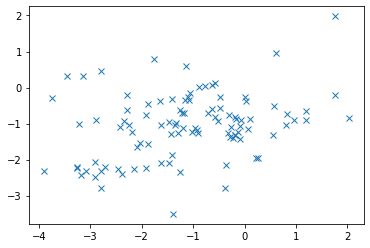

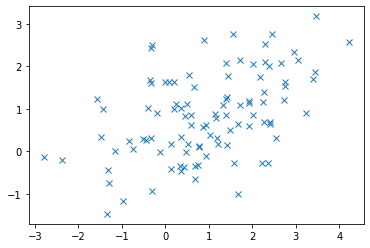

In [ ]:
#C
#1
mean1=[-1, -1]
cov1=[[2, 0.5],[0.5, 1]]
x1, x2=np.random.default_rng().multivariate_normal(mean1, cov1, 100).T
plt.plot(x1, x2, 'x')
#plt.axis('equal')
plt.show()
X1=[]
for i in range(100):
  X1.append([x1[i], x2[i]])
#now data is the 2x1 matrix containing all the points of class 1

mean2=[1, 1]
cov2=[[2, 0.5],[0.5, 1]]
d1, d2=np.random.default_rng().multivariate_normal(mean2, cov2, 100).T
plt.plot(d1, d2, 'x')
#plt.axis('equal')
plt.show()

X2=[]
for i in range(100):
  X2.append([d1[i], d2[i]])

In [ ]:
list1=[item[0] for item in data]
list2=[item[0] for item in data2]
listf=list1+list2

list1=[item[1] for item in data]
list2=[item[1] for item in data2]
listf2=list1+list2

z=np.array([listf, listf2])
z.shape

(2, 200)

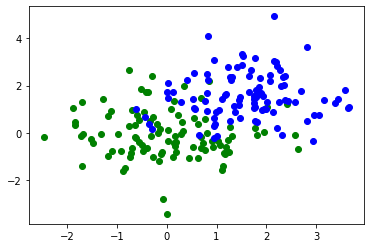

In [ ]:
#2
plt.scatter([item[0] for item in data], [item[1] for item in data], c='g')
plt.scatter([item[0] for item in data2], [item[1] for item in data2], c='b')
plt.show()

In [ ]:
#3
muz=[]
muz.append(sum(z[0])/200)
muz.append(sum(z[1])/200)
z2=np.array(muz)
z2


array([0.79582257, 0.76083638])

In [ ]:
#centralised data
X=[]
for i in range(200):
  X.append([z[0][i]-muz[0], z[1][i]-muz[1]]) 

a=sum(item[0]*item[0] for item in X)/200
b=sum(item[0]*item[1] for item in X)/200
c=sum(item[1]*item[0] for item in X)/200
d=sum(item[1]*item[1] for item in X)/200
S=[[a, b], [c, d]]
S

[[1.6083395058844578, 0.6573930160424755],
 [0.6573930160424755, 1.6566215898494767]]

In [ ]:
#4
eigenvalue, eigenvector=np.linalg.eig(S)
print(eigenvalue)
print(eigenvector)

[0.97464442 2.29031667]
[[-0.71996446 -0.69401093]
 [ 0.69401093 -0.71996446]]


In [ ]:
U=[[eigenvector[0][0], eigenvector[1][0]], [eigenvector[0][1], eigenvector[1][1]]]
print(U)

[[-0.7199644620407786, 0.6940109317570813], [-0.6940109317570813, -0.7199644620407786]]


In [ ]:
#5
Y=[]
for i in range(200):
  Y.append(U[0][0]*X[i][0] + U[0][1]*X[i][1])
print(Y)

[0.12014428627612284, 0.6996173534469043, -0.47246380347748995, -0.7016494029227074, -0.19864629816454576, -0.5757833439384735, 1.212649577309619, -0.5420281623658816, 0.6271832761309128, 0.054455622087572375, 1.3799159489154322, -1.032377783900281, -1.8642348081576248, -1.3485758439065902, -0.1345486965827789, -0.13590063526858953, -0.8423747703222527, 1.0014728215887807, 0.6864274098293237, 1.6910202749699583, -1.237374064038673, -0.6434994344579983, 0.7970222784323526, -0.6690849895227663, -0.3786721944537259, 0.17341222412952795, -1.893504194168392, -0.21173140074072483, 0.1593862258652119, 1.517745707919582, 0.9384845302642474, 0.25911578224924375, -1.8532998829721108, -1.738942460608536, 0.3296143863074541, 1.524090697395422, 0.7342118230011296, -0.4773119877042078, -1.041954846870618, 1.5842108786007907, -1.073120745750157, -0.9819450409846269, 0.07511179432447138, -1.1404562372160028, -1.0291712400525936, -0.9367365455972749, -0.9114922028690154, -0.12343176513261178, 0.3773063

In [ ]:
#6
Y1=[]
for i in range(100):
  Y1.append(U[0][0]*X1[i][0] + U[0][1]*X1[i][1])
print(Y1)

Y2=[]
for i in range(100):
  Y2.append(U[0][0]*X2[i][0] + U[0][1]*X2[i][1])
print(Y2)

[-0.192495540486021, 0.8531217782609244, -0.43104434554312965, -1.489046336620249, 1.201586549952407, -0.14977075722039285, 0.49556143729143587, 0.5890248928954053, -0.5793644831389452, 0.2759827278768099, 2.4693106066705335, 1.0321848944891825, -0.5773556520878885, -1.3293931220473234, -0.7651316133904661, 2.7054737573590915, 0.13281764177628608, 0.07826143398475827, 0.21627093557211147, -0.27066112041443274, 0.7287922404251718, -1.4354083870800323, -0.7218420770532799, 0.04711307160708278, 0.7935497673599854, 2.3384154247580335, 0.10018562304626699, -0.6672153394370542, -1.1028959598362946, 0.37517686889154717, -0.2937377659956526, -1.5288014180237481, -0.28724824615190725, 0.08463786280872687, -1.659632796414737, 0.3864637439689107, 0.34860770002146885, 1.2397413718263208, 0.5321062356237373, 0.05154511105281245, 0.048151740421672695, -1.5386233696118132, -0.7719072292142387, 0.6458280913750802, -0.3087750613156676, -0.08744074726042694, 0.39420231353566426, 0.2122189391303153, -0.8

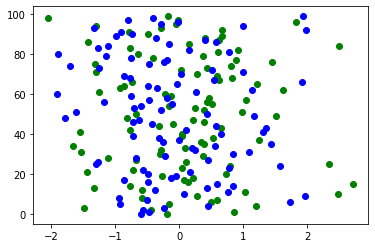

In [ ]:
plt.scatter([item for item in Y1], [i for i in range(100)], c='g')
plt.scatter([item for item in Y2], [i for i in range(100)], c='b')
plt.show()

In [ ]:
#7
fr=[]
for i in range(200):
  fr.append(U[0][0]*Y[i])
sr=[]
for i in range(200):
  sr.append(U[0][1]*Y[i])

X_reconstructed=[fr,sr]
print(X_reconstructed)

[[-0.08649961643606208, -0.5036996315087937, 0.34015714810441117, 0.5051626349164805, 0.14301827519442928, 0.41454354547070366, -0.8730646005716974, 0.39024101432870373, -0.45154967000056573, -0.039206112661374984, -0.9934904438223896, 0.7432753158086169, 1.3421828107728984, 0.9709266819793972, 0.09687027995350836, 0.09784362776215012, 0.6064798983517851, -0.7210248412436271, -0.4942033408478141, -1.2174745025687954, 0.8908653523588151, 0.46329672415309797, -0.5738277159260644, 0.4817174145413184, 0.27263052276967786, -0.1248506386567105, 1.3632557285264044, 0.15243908403143647, -0.11475241836175731, -1.0927229721170224, -0.6756755099652917, -0.1865541547733523, 1.3343100532442536, 1.2519767731718925, -0.23731064431874757, -1.09729113905165, -0.5286064201709877, 0.3436476684530747, 0.7501704607979862, -1.1405755329709675, 0.772608800418811, 0.7069655331861071, -0.05407782259373564, 0.82108796130827, 0.7409667181923065, 0.6744170231248793, 0.6562419934929549, 0.08886648438244457, -0.271

In [ ]:
Z_reconstructed=[]
Z_reconstructed.append([item+muz[0] for item in X_reconstructed[0]])
Z_reconstructed.append([item+muz[1] for item in X_reconstructed[1]])

print(Z_reconstructed)

[[0.7093229491556348, 0.29212293408290313, 1.135979713696108, 1.3009852005081775, 0.9388408407861262, 1.2103661110624004, -0.0772420349800006, 1.1860635799204005, 0.3442728955911311, 0.7566164529303219, -0.19766787823069276, 1.5390978814003138, 2.138005376364595, 1.7667492475710942, 0.8926928455452052, 0.893666193353847, 1.402302463943482, 0.07479772434806975, 0.30161922474388275, -0.4216519369770986, 1.686687917950512, 1.259119289744795, 0.22199484966563243, 1.2775399801330152, 1.0684530883613748, 0.6709719269349863, 2.1590782941181015, 0.9482616496231333, 0.6810701472299395, -0.29690040652532557, 0.12014705562640515, 0.6092684108183446, 2.13013261883595, 2.047799338763589, 0.5585119212729492, -0.30146857345995315, 0.26721614542070915, 1.1394702340447715, 1.545993026389683, -0.34475296737927064, 1.5684313660105078, 1.502788098777804, 0.7417447429979612, 1.6169105268999668, 1.5367892837840034, 1.4702395887165762, 1.4520645590846517, 0.8846890499741414, 0.5241753993388789, 0.11659358027

In [ ]:
a=Z_reconstructed-z
a=a*a
mean=[]
mean.append(sum(a[0][i] for i in range(200))/200)
mean.append(sum(a[1][i] for i in range(200))/200)
mse=(mean[0]+mean[1])/2
print(mse)

1.1451583364693612
